In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

### Import CSVs

In [3]:
domestic_2019_df = pd.read_csv('T100D_2019_data.csv')

In [4]:
domestic_2019_df.shape

(122975, 19)

In [5]:
domestic_2018_df = pd.read_csv('T100D_2018_data.csv')

In [6]:
domestic_2018_df.shape

(250353, 19)

In [7]:
domestic_2017_df = pd.read_csv('T100D_2017_data.csv')

In [8]:
domestic_2016_df = pd.read_csv('T100D_2016_data.csv')

In [9]:
domestic_2015_df = pd.read_csv('T100D_2015_data.csv')

In [10]:
domestic_2014_df = pd.read_csv('T100D_2014_data.csv')

In [11]:
domestic_2013_df = pd.read_csv('T100D_2013_data.csv')

In [12]:
domestic_2012_df = pd.read_csv('T100D_2012_data.csv')

In [13]:
domestic_2011_df = pd.read_csv('T100D_2011_data.csv')

In [14]:
domestic_2010_df = pd.read_csv('T100D_2010_data.csv')

In [15]:
domestic_df = pd.concat([domestic_2019_df, domestic_2018_df, domestic_2017_df, domestic_2016_df, domestic_2015_df,
                        domestic_2014_df, domestic_2013_df, domestic_2012_df, domestic_2011_df, domestic_2010_df])

In [16]:
domestic_df

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 18
0,0.0,1241.0,0WQ,Avjet Corporation,10423,30423,AUS,"Austin, TX",Texas,10800,32575,BUR,"Burbank, CA",California,2019,1,3,L,NaN
1,0.0,256.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,13476,34922,MRY,"Monterey, CA",California,2019,1,1,L,NaN
2,0.0,325.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,13796,32457,OAK,"Oakland, CA",California,2019,1,1,L,NaN
3,0.0,46.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,14908,32575,SNA,"Santa Ana, CA",California,2019,1,1,L,NaN
4,0.0,100.0,0WQ,Avjet Corporation,12173,32134,HNL,"Honolulu, HI",Hawaii,13830,33830,OGG,"Kahului, HI",Hawaii,2019,1,1,L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263157,83752.0,403.0,DL,Delta Air Lines Inc.,10397,30397,ATL,"Atlanta, GA",Georgia,13204,31454,MCO,"Orlando, FL",Florida,2010,10,1,F,NaN
263158,84322.0,100.0,HA,Hawaiian Airlines Inc.,12173,32134,HNL,"Honolulu, HI",Hawaii,13830,33830,OGG,"Kahului, HI",Hawaii,2010,7,1,F,NaN
263159,84717.0,100.0,HA,Hawaiian Airlines Inc.,13830,33830,OGG,"Kahului, HI",Hawaii,12173,32134,HNL,"Honolulu, HI",Hawaii,2010,8,1,F,NaN
263160,85216.0,403.0,DL,Delta Air Lines Inc.,10397,30397,ATL,"Atlanta, GA",Georgia,13204,31454,MCO,"Orlando, FL",Florida,2010,3,1,F,NaN


In [17]:
del domestic_df['Unnamed: 18']

The 'CITY_MARKET_ID' column groups airports in different cities that serve the same market, so we'll use that as the main identifier for a destination. Supplementary tables are provided detailing the city market based on code, which we'll include in the table.

In [18]:
domestic_df.set_index('DEST_CITY_MARKET_ID', inplace=True)

In [19]:
#import supplementary table of markets based on city market ID
markets = pd.read_csv('L_CITY_MARKET_ID.csv', index_col='Code')

In [20]:
#join tables for additional column of market 
domestic_df = domestic_df.join(markets, how='left')

In [21]:
domestic_df.isna().sum()

PASSENGERS                 0
DISTANCE                   0
UNIQUE_CARRIER           358
UNIQUE_CARRIER_NAME      171
ORIGIN_AIRPORT_ID          0
ORIGIN_CITY_MARKET_ID      0
ORIGIN                     0
ORIGIN_CITY_NAME           0
ORIGIN_STATE_NM            0
DEST_AIRPORT_ID            0
DEST                       0
DEST_CITY_NAME             0
DEST_STATE_NM              0
YEAR                       0
MONTH                      0
DISTANCE_GROUP             0
CLASS                      0
Description                0
dtype: int64

In [22]:
domestic_df['Day'] = 1

In [23]:
#create Datetime column
domestic_df['ds'] = pd.to_datetime(domestic_df[['YEAR','MONTH', 'Day']])

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [24]:
domestic_df.set_index('ds', inplace=True)

In [25]:
domestic_df.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,MONTH,DISTANCE_GROUP,CLASS,Description,Day
ds,,,,,,,,,,,,,,,,,,,
2019-06-01,6.0,109.0,8E,Bering Air Inc.,13970,33970,OTZ,"Kotzebue, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2019,6,1,L,"Granite Mountain, AK",1
2014-07-01,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2014,7,1,L,"Granite Mountain, AK",1
2013-08-01,0.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,8,1,L,"Granite Mountain, AK",1
2013-09-01,0.0,147.0,7S,Ryan Air f/k/a Arctic Transportation,13873,33873,OME,"Nome, AK",Alaska,10003,03A,"Granite Mountain, AK",Alaska,2013,9,1,G,"Granite Mountain, AK",1
2013-07-01,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,7,1,L,"Granite Mountain, AK",1


In [26]:
domestic_df = domestic_df[['PASSENGERS', 'Description']]
domestic_df.head()

,PASSENGERS,Description
ds,,
2019-06-01,6.0,"Granite Mountain, AK"
2014-07-01,3.0,"Granite Mountain, AK"
2013-08-01,0.0,"Granite Mountain, AK"
2013-09-01,0.0,"Granite Mountain, AK"
2013-07-01,3.0,"Granite Mountain, AK"


In [27]:
domestic_df['city'] = domestic_df['Description'].apply(lambda x: x.split(',')[0].split('/')[0])

In [28]:
domestic_df.head()

,PASSENGERS,Description,city
ds,,,
2019-06-01,6.0,"Granite Mountain, AK",Granite Mountain
2014-07-01,3.0,"Granite Mountain, AK",Granite Mountain
2013-08-01,0.0,"Granite Mountain, AK",Granite Mountain
2013-09-01,0.0,"Granite Mountain, AK",Granite Mountain
2013-07-01,3.0,"Granite Mountain, AK",Granite Mountain


In [29]:
sums = pd.DataFrame(domestic_df.groupby('Description')['PASSENGERS'].sum())

Find top 25 US cities visited

In [30]:
top_cities = sums.sort_values('PASSENGERS', ascending=False)
top_25 = list(top_cities[:25].index)
top_25

['Atlanta, GA (Metropolitan Area)',
 'New York City, NY (Metropolitan Area)',
 'Chicago, IL',
 'Los Angeles, CA (Metropolitan Area)',
 'Dallas/Fort Worth, TX',
 'Washington, DC (Metropolitan Area)',
 'San Francisco, CA (Metropolitan Area)',
 'Denver, CO',
 'Houston, TX',
 'Miami, FL (Metropolitan Area)',
 'Phoenix, AZ',
 'Las Vegas, NV',
 'Charlotte, NC',
 'Seattle, WA',
 'Orlando, FL',
 'Boston, MA (Metropolitan Area)',
 'Minneapolis/St. Paul, MN',
 'Detroit, MI',
 'Philadelphia, PA',
 'Salt Lake City, UT',
 'San Diego, CA',
 'Tampa, FL (Metropolitan Area)',
 'Portland, OR',
 'Honolulu, HI',
 'St. Louis, MO']

In [31]:
#remove cities not in top 25 from US dataframe
domestic_df = domestic_df[domestic_df['Description'].apply(lambda x: x in top_25)]

In [32]:
domestic_df.head()

,PASSENGERS,Description,city
ds,,,
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas


In [33]:
#group by day and destination
domestic_df = pd.DataFrame(domestic_df.groupby([domestic_df.index,'Description', 'city'])['PASSENGERS'].sum().reset_index())


In [34]:
domestic_df['Type'] = 'Domestic'

In [35]:
domestic_df.head()

,ds,Description,city,PASSENGERS,Type
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2735491.0,Domestic
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1008661.0,Domestic
2,2010-01-01,"Charlotte, NC",Charlotte,1221593.0,Domestic
3,2010-01-01,"Chicago, IL",Chicago,2427421.0,Domestic
4,2010-01-01,"Dallas/Fort Worth, TX",Dallas,2114255.0,Domestic


## Import International Data

In [36]:
international_df = pd.read_csv('International_data.csv', header=[1])
international_df

,Region,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,Jan-10,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,Feb-10,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,Mar-10,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,Apr-10,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,May-10,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
international_df = international_df.rename(columns = {'Region':'ds'})

In [38]:
international_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 20 columns):
ds                       114 non-null object
Hong Kong SAR (China)    114 non-null object
United Kingdom           114 non-null object
Singapore                114 non-null object
France                   114 non-null object
United Arab Emirates     108 non-null object
Malaysia                 114 non-null object
Thailand                 114 non-null object
India                    114 non-null object
Japan                    90 non-null object
Italy                    114 non-null object
Turkey                   114 non-null object
Taiwan                   114 non-null object
Netherlands              114 non-null object
South Korea              65 non-null object
Spain                    114 non-null object
Germany                  102 non-null object
Greece                   81 non-null object
Croatia                  114 non-null object
Iceland                  114 non-null objec

In [39]:
international_df['ds'] = pd.to_datetime(international_df['ds'],format='%b-%y', yearfirst=False)

In [40]:
international_df.head()

,ds,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,2010-01-01,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,2010-02-01,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,2010-03-01,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,2010-04-01,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,2010-05-01,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"


In [41]:
#impute subsequent value for that month and location to NaNs:
# international_df = international_df.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None)

In [42]:
international_df = international_df[international_df.ds < '2019-02-01']

In [43]:
international_df.head()

,ds,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,2010-01-01,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,2010-02-01,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,2010-03-01,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,2010-04-01,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,2010-05-01,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"


In [44]:
#impute following value for that month and location to NaNs:

international_df = international_df.fillna(value=None, method='ffill', axis=None, limit=35, downcast=None)

In [45]:
international_df.isna().sum()

ds                        0
Hong Kong SAR (China)     0
United Kingdom            0
Singapore                 0
France                    0
United Arab Emirates      0
Malaysia                  0
Thailand                  0
India                     0
Japan                    24
Italy                     0
Turkey                    0
Taiwan                    0
Netherlands               0
South Korea              31
Spain                     0
Germany                  12
Greece                   33
Croatia                   0
Iceland                   0
dtype: int64

In [46]:
international_df = pd.DataFrame(international_df.set_index('ds').unstack()).reset_index()
international_df

,level_0,ds,0
0,Hong Kong SAR (China),2010-01-01,"1,906,253"
1,Hong Kong SAR (China),2010-02-01,"1,903,106"
2,Hong Kong SAR (China),2010-03-01,"1,996,482"
3,Hong Kong SAR (China),2010-04-01,"2,066,587"
4,Hong Kong SAR (China),2010-05-01,"1,989,423"
...,...,...,...
2066,Iceland,2018-09-01,"265,842"
2067,Iceland,2018-10-01,"263,587"
2068,Iceland,2018-11-01,"184,982"
2069,Iceland,2018-12-01,"186,853"


In [47]:
international_df = international_df.rename(columns = {'level_0': 'city', 0: 'PASSENGERS'})

In [48]:
international_df['Type'] = 'International'

In [49]:
international_df.head()

,city,ds,PASSENGERS,Type
0,Hong Kong SAR (China),2010-01-01,"1,906,253",International
1,Hong Kong SAR (China),2010-02-01,"1,903,106",International
2,Hong Kong SAR (China),2010-03-01,"1,996,482",International
3,Hong Kong SAR (China),2010-04-01,"2,066,587",International
4,Hong Kong SAR (China),2010-05-01,"1,989,423",International


In [50]:
international_df.loc[international_df['city'] == 'Hong Kong SAR (China)', 'city'] = 'Hong Kong'

In [51]:
international_df.loc[international_df['city'] == 'United Kingdom', 'city'] = 'London'
international_df.loc[international_df['city'] == 'France', 'city'] = 'Paris'
international_df.loc[international_df['city'] == 'United Arab Emirates', 'city'] = 'Dubai'
international_df.loc[international_df['city'] == 'Malaysia', 'city'] = 'Kuala Lumpur'
international_df.loc[international_df['city'] == 'Thailand', 'city'] = 'Phuket'
international_df.loc[international_df['city'] == 'India', 'city'] = 'Delhi'
international_df.loc[international_df['city'] == 'Japan', 'city'] = 'Tokyo'
international_df.loc[international_df['city'] == 'Italy', 'city'] = 'Rome'
international_df.loc[international_df['city'] == 'Turkey', 'city'] = 'Antalya'
international_df.loc[international_df['city'] == 'Taiwan', 'city'] = 'Taipei'
international_df.loc[international_df['city'] == 'Netherlands', 'city'] = 'Amsterdam'
international_df.loc[international_df['city'] == 'South Korea', 'city'] = 'Seoul'
international_df.loc[international_df['city'] == 'Spain', 'city'] = 'Barcelona'
international_df.loc[international_df['city'] == 'Germany', 'city'] = 'Berlin'
international_df.loc[international_df['city'] == 'Greece', 'city'] = 'Athens'
international_df.loc[international_df['city'] == 'Iceland', 'city'] = 'Reykjavik'

In [52]:
international_df

,city,ds,PASSENGERS,Type
0,Hong Kong,2010-01-01,"1,906,253",International
1,Hong Kong,2010-02-01,"1,903,106",International
2,Hong Kong,2010-03-01,"1,996,482",International
3,Hong Kong,2010-04-01,"2,066,587",International
4,Hong Kong,2010-05-01,"1,989,423",International
...,...,...,...,...
2066,Reykjavik,2018-09-01,"265,842",International
2067,Reykjavik,2018-10-01,"263,587",International
2068,Reykjavik,2018-11-01,"184,982",International
2069,Reykjavik,2018-12-01,"186,853",International


In [53]:
combined_df = pd.concat([domestic_df, international_df], sort=False)

In [54]:
combined_df

,ds,Description,city,PASSENGERS,Type
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2.73549e+06,Domestic
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1.00866e+06,Domestic
2,2010-01-01,"Charlotte, NC",Charlotte,1.22159e+06,Domestic
3,2010-01-01,"Chicago, IL",Chicago,2.42742e+06,Domestic
4,2010-01-01,"Dallas/Fort Worth, TX",Dallas,2.11426e+06,Domestic
...,...,...,...,...,...
2066,2018-09-01,NaN,Reykjavik,"265,842",International
2067,2018-10-01,NaN,Reykjavik,"263,587",International
2068,2018-11-01,NaN,Reykjavik,"184,982",International
2069,2018-12-01,NaN,Reykjavik,"186,853",International


In [55]:
combined_df['Month'] = combined_df.ds.apply(lambda x: x.month)

In [56]:
combined_df.isna().sum()

ds                0
Description    2071
city              0
PASSENGERS      100
Type              0
Month             0
dtype: int64

In [57]:
combined_df.groupby(['city', 'Month'])['PASSENGERS']

In [58]:
#impute following value for that month and location to NaNs:
combined_df.PASSENGERS = combined_df.groupby(['city', 'Month']).PASSENGERS.bfill()



In [59]:
combined_df

,ds,Description,city,PASSENGERS,Type,Month
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2.73549e+06,Domestic,1
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1.00866e+06,Domestic,1
2,2010-01-01,"Charlotte, NC",Charlotte,1.22159e+06,Domestic,1
3,2010-01-01,"Chicago, IL",Chicago,2.42742e+06,Domestic,1
4,2010-01-01,"Dallas/Fort Worth, TX",Dallas,2.11426e+06,Domestic,1
...,...,...,...,...,...,...
2066,2018-09-01,NaN,Reykjavik,"265,842",International,9
2067,2018-10-01,NaN,Reykjavik,"263,587",International,10
2068,2018-11-01,NaN,Reykjavik,"184,982",International,11
2069,2018-12-01,NaN,Reykjavik,"186,853",International,12


In [60]:
del combined_df['Description']
del combined_df['Month']

In [61]:
combined_df.isna().sum()

ds            0
city          0
PASSENGERS    0
Type          0
dtype: int64

## Get Weather Data

In [62]:
import requests

In [63]:
dom_cities = list(map(lambda x: x.split('(')[0].split(',')[0].split('/')[0], top_25))
for i, city in enumerate(dom_cities):
    dom_cities[i] = city.replace(' ', '_')
    
dom_cities

['Atlanta',
 'New_York_City',
 'Chicago',
 'Los_Angeles',
 'Dallas',
 'Washington',
 'San_Francisco',
 'Denver',
 'Houston',
 'Miami',
 'Phoenix',
 'Las_Vegas',
 'Charlotte',
 'Seattle',
 'Orlando',
 'Boston',
 'Minneapolis',
 'Detroit',
 'Philadelphia',
 'Salt_Lake_City',
 'San_Diego',
 'Tampa',
 'Portland',
 'Honolulu',
 'St._Louis']

In [64]:
int_cities = list(map(lambda x: x.split('(')[0].split(',')[0].split('/')[0], international_df['city'].unique()))
for i, city in enumerate(int_cities):
    int_cities[i] = city.replace(' ', '_')
    
int_cities

['Hong_Kong',
 'London',
 'Singapore',
 'Paris',
 'Dubai',
 'Kuala_Lumpur',
 'Phuket',
 'Delhi',
 'Tokyo',
 'Rome',
 'Antalya',
 'Taipei',
 'Amsterdam',
 'Seoul',
 'Barcelona',
 'Berlin',
 'Athens',
 'Croatia',
 'Reykjavik']

In [65]:
cities = dom_cities + int_cities

In [66]:
api_key = 'exbuNW5R'

In [67]:
stations = {}
for city in cities:
    try:
        response = requests.get(f'https://api.meteostat.net/v1/stations/search?q={city}&key=exbuNW5R').json()
        station = response['data'][0]['id']
        stations[f'{city}'] = station
    except:
        stations[f'{city}'] = 'Not Available'

In [68]:
stations

{'Atlanta': '72219',
 'New_York_City': 'KNYC0',
 'Chicago': '72530',
 'Los_Angeles': '72295',
 'Dallas': '72259',
 'Washington': '72405',
 'San_Francisco': '72494',
 'Denver': '72565',
 'Houston': '72243',
 'Miami': '72202',
 'Phoenix': '72278',
 'Las_Vegas': '78373',
 'Charlotte': '72314',
 'Seattle': '72793',
 'Orlando': '72205',
 'Boston': '72509',
 'Minneapolis': '72658',
 'Detroit': '72537',
 'Philadelphia': '72408',
 'Salt_Lake_City': '72572',
 'San_Diego': '72290',
 'Tampa': '72211',
 'Portland': '72606',
 'Honolulu': '91182',
 'St._Louis': 'KSUS0',
 'Hong_Kong': '45007',
 'London': '68858',
 'Singapore': '48698',
 'Paris': '07149',
 'Dubai': '41194',
 'Kuala_Lumpur': 'Not Available',
 'Phuket': '48564',
 'Delhi': '42182',
 'Tokyo': '47662',
 'Rome': '93110',
 'Antalya': '17300',
 'Taipei': '46696',
 'Amsterdam': '06240',
 'Seoul': '47110',
 'Barcelona': '08181',
 'Berlin': '10381',
 'Athens': '72311',
 'Croatia': 'Not Available',
 'Reykjavik': '04030'}

In [69]:
requests.get(f'https://api.meteostat.net/v1/stations/search?q=fuzhou&key=exbuNW5R').json()

{'meta': {}, 'data': [{'id': '58847', 'country': 'CN', 'name': 'Fuzhou'}]}

In [70]:
stations['New_York_City'] = 72503
stations['St._Louis'] = 72434
stations['Washington'] = 72406
stations['Kuala_Lumpur'] = 48665
stations['Taipei'] = 46756
stations['Croatia'] = 14474
stations['Las_Vegas'] = 72488
stations['Croatia'] = 14445
stations['Hong_Kong'] = 59431
stations['Seoul'] = 47108
stations['Phuket'] = 48565
stations['Amsterdam'] = 10312
stations['Taipei'] = 58847

In [71]:
stations

{'Atlanta': '72219',
 'New_York_City': 72503,
 'Chicago': '72530',
 'Los_Angeles': '72295',
 'Dallas': '72259',
 'Washington': 72406,
 'San_Francisco': '72494',
 'Denver': '72565',
 'Houston': '72243',
 'Miami': '72202',
 'Phoenix': '72278',
 'Las_Vegas': 72488,
 'Charlotte': '72314',
 'Seattle': '72793',
 'Orlando': '72205',
 'Boston': '72509',
 'Minneapolis': '72658',
 'Detroit': '72537',
 'Philadelphia': '72408',
 'Salt_Lake_City': '72572',
 'San_Diego': '72290',
 'Tampa': '72211',
 'Portland': '72606',
 'Honolulu': '91182',
 'St._Louis': 72434,
 'Hong_Kong': 59431,
 'London': '68858',
 'Singapore': '48698',
 'Paris': '07149',
 'Dubai': '41194',
 'Kuala_Lumpur': 48665,
 'Phuket': 48565,
 'Delhi': '42182',
 'Tokyo': '47662',
 'Rome': '93110',
 'Antalya': '17300',
 'Taipei': 58847,
 'Amsterdam': 10312,
 'Seoul': 47108,
 'Barcelona': '08181',
 'Berlin': '10381',
 'Athens': '72311',
 'Croatia': 14445,
 'Reykjavik': '04030'}

In [72]:
def get_weather_data(stations):
    city_weather_history = []
    city = {}

    for i, v in stations.items():
        response = requests.get(f'https://api.meteostat.net/v1/history/monthly?station={v}&start=2009-01&end=2019-01&key=exbuNW5R').json() 
        for m in response['data']:
            try:
                month = {}
                month['city_name'] = i
                month['month'] = m['month']
                month['temperature_mean'] = m['temperature_mean']
                month['precipitation'] = m['precipitation']
                month['rain_days'] = m['raindays']
                month['pressure'] = m['pressure']

                city_weather_history.append(month) 
#                 print(f"Retrieved {i}'s weather data")
            except:
                month['city_name'] = i
                month['month'] = 0
                month['temperature_mean'] = 0
                month['precipitation'] = 0
                month['rain_days'] = 0
                month['pressure'] = 0
                city_weather_history.append(month) 
#                 print(f"Could not retrieve {i}'s weather data")
    
    return city_weather_history

In [73]:
requests.get(f'https://api.meteostat.net/v1/history/monthly?station=58847&start=2009-01&end=2019-01&key=exbuNW5R').json()

{'meta': {'source': 'National Oceanic and Atmospheric Administration, Deutscher Wetterdienst'},
 'data': [{'month': '2009-01',
   'temperature_mean': 10.7,
   'temperature_mean_min': 7.2,
   'temperature_mean_max': 15.7,
   'temperature_min': 1.5,
   'temperature_max': 24.2,
   'precipitation': 24,
   'raindays': 4,
   'pressure': 1025,
   'sunshine': 147},
  {'month': '2009-02',
   'temperature_mean': 15.5,
   'temperature_mean_min': 12.4,
   'temperature_mean_max': 21.1,
   'temperature_min': 7.4,
   'temperature_max': 29.7,
   'precipitation': 12,
   'raindays': 2,
   'pressure': 1017.9,
   'sunshine': 94},
  {'month': '2009-03',
   'temperature_mean': 14.2,
   'temperature_mean_min': 11.1,
   'temperature_mean_max': 18.7,
   'temperature_min': 6.1,
   'temperature_max': 29.3,
   'precipitation': 115,
   'raindays': 14,
   'pressure': 1018.2,
   'sunshine': 93},
  {'month': '2009-04',
   'temperature_mean': 18.8,
   'temperature_mean_min': 15.6,
   'temperature_mean_max': 23.7,
   '

In [74]:
weather_data = pd.DataFrame(get_weather_data(stations))

In [75]:
weather_data

,city_name,month,temperature_mean,precipitation,rain_days,pressure
0,Atlanta,2009-01,6.5,73.0,10.0,1019.6
1,Atlanta,2009-02,8.6,94.0,4.0,1022.3
2,Atlanta,2009-03,12.8,181.0,8.0,1020.4
3,Atlanta,2009-04,15.9,132.0,9.0,1016.8
4,Atlanta,2009-05,21.2,115.0,14.0,1016.8
...,...,...,...,...,...,...
5259,Reykjavik,2018-09,7.1,75.0,15.0,1004.6
5260,Reykjavik,2018-10,3.9,114.0,21.0,998.5
5261,Reykjavik,2018-11,4.2,107.0,9.0,1002.3
5262,Reykjavik,2018-12,2.7,82.0,16.0,998.5


In [76]:
weather_data['city_name'] = weather_data['city_name'].apply(lambda x: x.replace('_', ' '))

In [77]:
#create Datetime column
weather_data['Year'] = weather_data.month.apply(lambda x: x.split('-')[0])
weather_data['Month'] = weather_data.month.apply(lambda x: x.split('-')[1])
weather_data['Day'] = 1
weather_data['month'] = pd.to_datetime(weather_data[['Year','Month', 'Day']])

In [78]:
weather_data.isna().sum()

city_name             0
month                 0
temperature_mean      3
precipitation        55
rain_days            33
pressure            174
Year                  0
Month                 0
Day                   0
dtype: int64

In [79]:
#impute mean temperature for that month and location to NaNs:
weather_data['temperature_mean'] = weather_data.groupby(['city_name', 'Month'])['temperature_mean'].transform(lambda x: x.fillna(x.mean()))

In [80]:
#impute mean precipitation for that month and location to NaNs:
weather_data['precipitation'] = weather_data.groupby(['city_name', 'Month'])['precipitation'].transform(lambda x: x.fillna(x.mean()))

In [81]:
#impute mean rain_days for that month and location to NaNs:
weather_data['rain_days'] = weather_data.groupby(['city_name', 'Month'])['rain_days'].transform(lambda x: x.fillna(x.mean()))

In [82]:
#impute mean pressure for that month and location to NaNs:
weather_data['pressure'] = weather_data.groupby(['city_name', 'Month'])['pressure'].transform(lambda x: x.fillna(x.mean()))

In [83]:
#impute mean pressure of dataset to NaNs where not available:
weather_data['pressure'] = weather_data['pressure'].transform(lambda x: x.fillna(x.mean()))

In [84]:
weather_data.isna().sum()

city_name           0
month               0
temperature_mean    0
precipitation       0
rain_days           0
pressure            0
Year                0
Month               0
Day                 0
dtype: int64

### Merge domestic df and weather

In [85]:
combined_df2 = combined_df.merge(weather_data, how='left', left_on = ['ds', 'city'], right_on = ['month', 'city_name'])


In [86]:
combined_df2 = combined_df2[combined_df2['ds'] < '2019-02-01']

In [87]:
combined_df2.head()

,ds,city,PASSENGERS,Type,city_name,month,temperature_mean,precipitation,rain_days,pressure,Year,Month,Day
0,2010-01-01,Atlanta,2.73549e+06,Domestic,Atlanta,2010-01-01,3.6,137.0,7.0,1019.500000,2010,01,1.0
1,2010-01-01,Boston,1.00866e+06,Domestic,Boston,2010-01-01,-1.3,60.0,5.0,1012.000000,2010,01,1.0
2,2010-01-01,Charlotte,1.22159e+06,Domestic,Charlotte,2010-01-01,3.1,124.0,7.0,1018.300000,2010,01,1.0
3,2010-01-01,Chicago,2.42742e+06,Domestic,Chicago,2010-01-01,-5.5,29.0,4.0,1020.000000,2010,01,1.0
4,2010-01-01,Dallas,2.11426e+06,Domestic,Dallas,2010-01-01,6.6,72.0,6.0,1020.711111,2010,01,1.0


In [88]:
combined_df2.isna().sum()

ds                   0
city                 0
PASSENGERS           0
Type                 0
city_name           24
month               24
temperature_mean    24
precipitation       24
rain_days           24
pressure            24
Year                24
Month               24
Day                 24
dtype: int64

In [89]:
combined_df2['Month'] = combined_df2['ds'].apply(lambda x: x.month)

In [90]:
combined_df2['Year'] = combined_df2['ds'].apply(lambda x: x.year)

In [91]:
combined_df2.head()

,ds,city,PASSENGERS,Type,city_name,month,temperature_mean,precipitation,rain_days,pressure,Year,Month,Day
0,2010-01-01,Atlanta,2.73549e+06,Domestic,Atlanta,2010-01-01,3.6,137.0,7.0,1019.500000,2010,1,1.0
1,2010-01-01,Boston,1.00866e+06,Domestic,Boston,2010-01-01,-1.3,60.0,5.0,1012.000000,2010,1,1.0
2,2010-01-01,Charlotte,1.22159e+06,Domestic,Charlotte,2010-01-01,3.1,124.0,7.0,1018.300000,2010,1,1.0
3,2010-01-01,Chicago,2.42742e+06,Domestic,Chicago,2010-01-01,-5.5,29.0,4.0,1020.000000,2010,1,1.0
4,2010-01-01,Dallas,2.11426e+06,Domestic,Dallas,2010-01-01,6.6,72.0,6.0,1020.711111,2010,1,1.0


In [92]:
combined_df2['temperature_mean'] = combined_df2.groupby(['city', 'Month'])['temperature_mean'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))
combined_df2['precipitation'] = combined_df2.groupby(['city', 'Month'])['precipitation'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))
combined_df2['rain_days'] = combined_df2.groupby(['city', 'Month'])['rain_days'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))
combined_df2['pressure'] = combined_df2.groupby(['city', 'Month'])['pressure'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))

In [93]:
combined_df2.isna().sum()

ds                   0
city                 0
PASSENGERS           0
Type                 0
city_name           24
month               24
temperature_mean     0
precipitation        0
rain_days            0
pressure             0
Year                 0
Month                0
Day                 24
dtype: int64

In [94]:
combined_df2 = combined_df2[['ds', 'city', 'PASSENGERS', 'Type','Month', 'Year','temperature_mean', 'precipitation', 'rain_days', 'pressure']]


In [95]:
combined_df2.head()

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.500000
1,2010-01-01,Boston,1.00866e+06,Domestic,1,2010,-1.3,60.0,5.0,1012.000000
2,2010-01-01,Charlotte,1.22159e+06,Domestic,1,2010,3.1,124.0,7.0,1018.300000
3,2010-01-01,Chicago,2.42742e+06,Domestic,1,2010,-5.5,29.0,4.0,1020.000000
4,2010-01-01,Dallas,2.11426e+06,Domestic,1,2010,6.6,72.0,6.0,1020.711111


In [96]:
combined_df2.isna().sum()

ds                  0
city                0
PASSENGERS          0
Type                0
Month               0
Year                0
temperature_mean    0
precipitation       0
rain_days           0
pressure            0
dtype: int64

## Get Cost of Living Index

In [97]:
from bs4 import BeautifulSoup as BS
import urllib.request

In [98]:
years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

cost_of_living = []
for year in years:
    url = f'https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}&displayColumn=0'
    resp = urllib.request.urlopen(url)
    soup = BS(resp, from_encoding=resp.info().get_param('charset'))
    table = soup.find_all(class_='cityOrCountryInIndicesTable')
    data = soup.find_all(_='sorting_1')
    for x in soup.find_all(style = 'width: 100%'):
        country = {}
        country['city'] = x.get_text(strip=True).split(',')[0]
        country['cost_of_living_index'] = x.get_text().split()[-1]
        country['year'] = year
        cost_of_living.append(country)

In [99]:
indexes= pd.DataFrame(cost_of_living)
indexes

,city,cost_of_living_index,year
0,Basel,131.37,2019
1,Zurich,126.87,2019
2,Lausanne,123.42,2019
3,Bern,123.17,2019
4,Geneva,118.87,2019
...,...,...,...
3797,Pune,32.55,2010
3798,Delhi,32.43,2010
3799,Hyderabad,32.00,2010
3800,Chennai,31.18,2010


In [100]:
indexes.isna().sum()

city                    0
cost_of_living_index    0
year                    0
dtype: int64

In [101]:
indexes['cost_of_living_index'] = pd.to_numeric(indexes['cost_of_living_index'], errors='coerce')

In [102]:
indexes.head()

,city,cost_of_living_index,year
0,Basel,131.37,2019
1,Zurich,126.87,2019
2,Lausanne,123.42,2019
3,Bern,123.17,2019
4,Geneva,118.87,2019


In [103]:
indexes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 3 columns):
city                    3802 non-null object
cost_of_living_index    3802 non-null float64
year                    3802 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 89.2+ KB


In [104]:
indexes[indexes.duplicated(subset=['year', 'city'])]

,city,cost_of_living_index,year
207,London,57.09,2019
221,San Jose,54.50,2019
476,Hamilton,88.09,2018
567,Portland,78.45,2018
584,Melbourne,77.09,2018
617,Burlington,74.32,2018
655,Birmingham,71.60,2018
658,Manchester,71.46,2018
685,London,69.39,2018
703,Vancouver,67.79,2018


In [105]:
indexes = indexes.sort_values('cost_of_living_index', ascending=False).drop_duplicates(['year','city']).sort_index()


In [106]:
indexes.city.replace('New York', 'New York City', inplace=True)
indexes.city.replace('Split', 'Croatia', inplace=True)
indexes.city.replace('Saint Louis', 'St. Louis', inplace=True)


In [107]:
indexes.year = indexes.year.astype(int)

In [108]:
combined_df3 = combined_df2.merge(indexes, how='left', left_on = ['Year', 'city'], right_on = ['year', 'city'])

In [109]:
combined_df3

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,year
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.500000,100.99,2010.0
1,2010-01-01,Boston,1.00866e+06,Domestic,1,2010,-1.3,60.0,5.0,1012.000000,89.11,2010.0
2,2010-01-01,Charlotte,1.22159e+06,Domestic,1,2010,3.1,124.0,7.0,1018.300000,NaN,NaN
3,2010-01-01,Chicago,2.42742e+06,Domestic,1,2010,-5.5,29.0,4.0,1020.000000,NaN,NaN
4,2010-01-01,Dallas,2.11426e+06,Domestic,1,2010,6.6,72.0,6.0,1020.711111,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4791,2018-09-01,Reykjavik,"265,842",International,9,2018,7.1,75.0,15.0,1004.600000,123.78,2018.0
4792,2018-10-01,Reykjavik,"263,587",International,10,2018,3.9,114.0,21.0,998.500000,123.78,2018.0
4793,2018-11-01,Reykjavik,"184,982",International,11,2018,4.2,107.0,9.0,1002.300000,123.78,2018.0
4794,2018-12-01,Reykjavik,"186,853",International,12,2018,2.7,82.0,16.0,998.500000,123.78,2018.0


In [110]:
combined_df3.isna().sum()

ds                        0
city                      0
PASSENGERS                0
Type                      0
Month                     0
Year                      0
temperature_mean          0
precipitation             0
rain_days                 0
pressure                  0
cost_of_living_index    588
year                    588
dtype: int64

In [111]:
del combined_df3['year']

In [112]:
combined_df3.sort_values(by='ds', inplace=True)

In [113]:
combined_df3['cost_of_living_index'] = combined_df3.groupby(['city'])['cost_of_living_index'].transform(lambda x: x.fillna(method='ffill'))
combined_df3['cost_of_living_index'] = combined_df3.groupby(['city'])['cost_of_living_index'].transform(lambda x: x.fillna(method='backfill'))


In [114]:
combined_df3['city'] = combined_df3['city'].str.strip()

In [115]:
combined_df3.reset_index(drop=True, inplace=True)

In [116]:
combined_df3

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99
1,2010-01-01,Washington,1.92949e+06,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19
2,2010-01-01,Singapore,"1,681,005",International,1,2010,27.5,70.0,8.0,1011.60,65.94
3,2010-01-01,Berlin,"489,487",International,1,2010,-4.9,21.0,7.0,1014.78,115.24
4,2010-01-01,Paris,"4,154,249",International,1,2010,0.6,36.0,7.0,1015.60,130.30
...,...,...,...,...,...,...,...,...,...,...,...
4791,2019-01-01,San Francisco,2.46216e+06,Domestic,1,2019,12.7,117.0,8.0,1018.20,91.67
4792,2019-01-01,Seattle,1.52515e+06,Domestic,1,2019,7.2,97.0,14.0,1017.90,84.16
4793,2019-01-01,St. Louis,525918,Domestic,1,2019,-0.7,75.0,9.0,1021.70,66.77
4794,2019-01-01,Los Angeles,3.17744e+06,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20


In [117]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 11 columns):
ds                      4796 non-null datetime64[ns]
city                    4796 non-null object
PASSENGERS              4796 non-null object
Type                    4796 non-null object
Month                   4796 non-null int64
Year                    4796 non-null int64
temperature_mean        4796 non-null float64
precipitation           4796 non-null float64
rain_days               4796 non-null float64
pressure                4796 non-null float64
cost_of_living_index    4796 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 412.3+ KB


In [118]:
combined_df3.isna().sum()

ds                      0
city                    0
PASSENGERS              0
Type                    0
Month                   0
Year                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
dtype: int64

## Getting population

In [119]:
import re

In [120]:
dom_cities = [city.lower().replace('_','-').replace('.','') for city in dom_cities]
dom_cities

['atlanta',
 'new-york-city',
 'chicago',
 'los-angeles',
 'dallas',
 'washington',
 'san-francisco',
 'denver',
 'houston',
 'miami',
 'phoenix',
 'las-vegas',
 'charlotte',
 'seattle',
 'orlando',
 'boston',
 'minneapolis',
 'detroit',
 'philadelphia',
 'salt-lake-city',
 'san-diego',
 'tampa',
 'portland',
 'honolulu',
 'st-louis']

In [121]:
dom_cities[5] = 'washington-dc'

In [122]:
int_cities = [city.lower().replace('_','-').replace('.','') for city in int_cities]
int_cities

['hong-kong',
 'london',
 'singapore',
 'paris',
 'dubai',
 'kuala-lumpur',
 'phuket',
 'delhi',
 'tokyo',
 'rome',
 'antalya',
 'taipei',
 'amsterdam',
 'seoul',
 'barcelona',
 'berlin',
 'athens',
 'croatia',
 'reykjavik']

In [123]:
pops = []

for city in dom_cities:
    try:
        page1 = requests.get(f'http://worldpopulationreview.com/us-cities/{city}-population/')
        soup1 = BS(page1.content, 'html.parser')
        data = soup1.find(class_ = 'table table-striped').get_text().split('%')
        for y in data[:10]:   
            town = {}
            town['city'] = city
            town['year'] = y.split()[-1][:4]
            town['population'] = re.match('^(\d{1,3}(,\d{3})*)?', y.split()[-1][4:]).group(0)
            print(f'Added {town}')
            pops.append(town)
    except:
        print(f"Couldn't retrieve {city}")
        
for city in int_cities:
    try:
        page1 = requests.get(f'http://worldpopulationreview.com/world-cities/{city}-population/')
        soup1 = BS(page1.content, 'html.parser')
        data = soup1.find(class_ = 'table table-striped').get_text().split('%')
        for y in data[2:10]:   
            town = {}
            town['city'] = city
            new = re.sub('^(\d{1,3}(,\d{3})*)?', '', y.split()[-1])
            town['year'] = new.split()[-1][:4]
            town['population'] = re.match('^(\d{1,3}(,\d{3})*)?', new.split()[-1][4:]).group(0)
            print(f'Added {town}')
            pops.append(town)
    except:
        print(f"Couldn't retrieve {city}")

Added {'city': 'atlanta', 'year': '2018', 'population': '498,044'}
Added {'city': 'atlanta', 'year': '2017', 'population': '491,763'}
Added {'city': 'atlanta', 'year': '2016', 'population': '478,916'}
Added {'city': 'atlanta', 'year': '2015', 'population': '468,707'}
Added {'city': 'atlanta', 'year': '2014', 'population': '460,998'}
Added {'city': 'atlanta', 'year': '2013', 'population': '453,791'}
Added {'city': 'atlanta', 'year': '2012', 'population': '448,799'}
Added {'city': 'atlanta', 'year': '2011', 'population': '437,563'}
Added {'city': 'atlanta', 'year': '2010', 'population': '429,193'}
Added {'city': 'atlanta', 'year': '2000', 'population': '416,474'}
Added {'city': 'new-york-city', 'year': '2018', 'population': '8,398,748'}
Added {'city': 'new-york-city', 'year': '2017', 'population': '8,438,271'}
Added {'city': 'new-york-city', 'year': '2016', 'population': '8,475,976'}
Added {'city': 'new-york-city', 'year': '2015', 'population': '8,468,181'}
Added {'city': 'new-york-city'

Added {'city': 'charlotte', 'year': '2018', 'population': '872,498'}
Added {'city': 'charlotte', 'year': '2017', 'population': '859,347'}
Added {'city': 'charlotte', 'year': '2016', 'population': '842,937'}
Added {'city': 'charlotte', 'year': '2015', 'population': '825,733'}
Added {'city': 'charlotte', 'year': '2014', 'population': '807,589'}
Added {'city': 'charlotte', 'year': '2013', 'population': '792,183'}
Added {'city': 'charlotte', 'year': '2012', 'population': '773,336'}
Added {'city': 'charlotte', 'year': '2011', 'population': '754,840'}
Added {'city': 'charlotte', 'year': '2010', 'population': '738,534'}
Added {'city': 'charlotte', 'year': '2000', 'population': '540,828'}
Added {'city': 'seattle', 'year': '2018', 'population': '744,955'}
Added {'city': 'seattle', 'year': '2017', 'population': '729,601'}
Added {'city': 'seattle', 'year': '2016', 'population': '710,510'}
Added {'city': 'seattle', 'year': '2015', 'population': '688,156'}
Added {'city': 'seattle', 'year': '2014', 

Added {'city': 'st-louis', 'year': '2018', 'population': '302,838'}
Added {'city': 'st-louis', 'year': '2017', 'population': '307,866'}
Added {'city': 'st-louis', 'year': '2016', 'population': '312,389'}
Added {'city': 'st-louis', 'year': '2015', 'population': '315,878'}
Added {'city': 'st-louis', 'year': '2014', 'population': '317,395'}
Added {'city': 'st-louis', 'year': '2013', 'population': '318,459'}
Added {'city': 'st-louis', 'year': '2012', 'population': '319,387'}
Added {'city': 'st-louis', 'year': '2011', 'population': '319,294'}
Added {'city': 'st-louis', 'year': '2010', 'population': '319,318'}
Added {'city': 'st-louis', 'year': '2000', 'population': '348,189'}
Added {'city': 'hong-kong', 'year': '2030', 'population': '7,987,249'}
Added {'city': 'hong-kong', 'year': '2025', 'population': '7,768,510'}
Added {'city': 'hong-kong', 'year': '2020', 'population': '7,547,652'}
Added {'city': 'hong-kong', 'year': '2015', 'population': '7,245,701'}
Added {'city': 'hong-kong', 'year': 

Added {'city': 'athens', 'year': '2030', 'population': '3,163,463'}
Added {'city': 'athens', 'year': '2025', 'population': '3,155,318'}
Added {'city': 'athens', 'year': '2020', 'population': '3,153,355'}
Added {'city': 'athens', 'year': '-7,8', 'population': '002'}
Added {'city': 'athens', 'year': '-9,2', 'population': '792'}
Added {'city': 'athens', 'year': '-9,3', 'population': '022'}
Added {'city': 'athens', 'year': '2000', 'population': '3,179,434'}
Added {'city': 'athens', 'year': '1995', 'population': '3,121,652'}
Couldn't retrieve croatia
Couldn't retrieve reykjavik


In [124]:
pops.append({'city': 'taipei', 'year': '2019', 'population': '7871900'})

In [125]:
pops.append({'city': 'zagreb', 'year': '2019', 'population': '798966'})

In [126]:
pops.append({'city': 'reykjavik', 'year': '2019', 'population': '340235'})

In [127]:
pops.append({'city': 'athens', 'year': '2019', 'population': '3179434'})

In [128]:
del pops[-8:-5]

In [129]:
pops

[{'city': 'atlanta', 'year': '2018', 'population': '498,044'},
 {'city': 'atlanta', 'year': '2017', 'population': '491,763'},
 {'city': 'atlanta', 'year': '2016', 'population': '478,916'},
 {'city': 'atlanta', 'year': '2015', 'population': '468,707'},
 {'city': 'atlanta', 'year': '2014', 'population': '460,998'},
 {'city': 'atlanta', 'year': '2013', 'population': '453,791'},
 {'city': 'atlanta', 'year': '2012', 'population': '448,799'},
 {'city': 'atlanta', 'year': '2011', 'population': '437,563'},
 {'city': 'atlanta', 'year': '2010', 'population': '429,193'},
 {'city': 'atlanta', 'year': '2000', 'population': '416,474'},
 {'city': 'new-york-city', 'year': '2018', 'population': '8,398,748'},
 {'city': 'new-york-city', 'year': '2017', 'population': '8,438,271'},
 {'city': 'new-york-city', 'year': '2016', 'population': '8,475,976'},
 {'city': 'new-york-city', 'year': '2015', 'population': '8,468,181'},
 {'city': 'new-york-city', 'year': '2014', 'population': '8,437,387'},
 {'city': 'new-

In [130]:
populations = pd.DataFrame(pops)
populations.tail(10)

,city,year,population
369,berlin,"-86,",978
370,athens,2030,"3,163,463"
371,athens,2025,"3,155,318"
372,athens,2020,"3,153,355"
373,athens,"-7,8",002
374,athens,1995,"3,121,652"
375,taipei,2019,7871900
376,zagreb,2019,798966
377,reykjavik,2019,340235
378,athens,2019,3179434


In [131]:
populations = populations[populations.population != '']

In [132]:
len(populations['city'].unique())

44

In [133]:
populations[populations.duplicated() == True]

,city,year,population


In [134]:
populations.city = populations.city.apply(lambda x: x.title().replace('-', ' '))

In [135]:
populations.city.value_counts()

Minneapolis       10
Dallas            10
Washington Dc     10
Atlanta           10
Denver            10
Houston           10
Los Angeles       10
Tampa             10
Honolulu          10
Orlando           10
Detroit           10
New York City     10
Boston            10
St Louis          10
Portland          10
Miami             10
Philadelphia      10
Phoenix           10
Salt Lake City    10
San Francisco     10
Seattle           10
Chicago           10
Charlotte         10
Las Vegas         10
San Diego         10
Dubai              8
Barcelona          8
Phuket             8
Delhi              8
Hong Kong          8
London             8
Kuala Lumpur       8
Paris              8
Singapore          8
Berlin             8
Amsterdam          8
Antalya            8
Rome               8
Seoul              7
Athens             6
Tokyo              5
Zagreb             1
Reykjavik          1
Taipei             1
Name: city, dtype: int64

In [136]:
populations.city = populations.city.replace('Washington Dc', 'Washington').replace('St Louis', 'St. Louis').replace('Zagreb', 'Croatia')

In [137]:
populations.head()

,city,year,population
0,Atlanta,2018,"498,044"
1,Atlanta,2017,"491,763"
2,Atlanta,2016,"478,916"
3,Atlanta,2015,"468,707"
4,Atlanta,2014,"460,998"


In [138]:
populations['population'] = populations['population'].apply(lambda x: x.replace(',', '').replace('-', '0'))
populations['year'] = populations['year'].apply(lambda x: x.replace(',', '').replace('-', '0'))

In [139]:
populations['year'] = populations.year.astype(int)
populations['population'] = populations.population.astype(int)
populations['city'] = populations.city.astype(str)

In [140]:
populations['city'] = populations['city'].str.strip()

In [141]:
populations.head(10)

,city,year,population
0,Atlanta,2018,498044
1,Atlanta,2017,491763
2,Atlanta,2016,478916
3,Atlanta,2015,468707
4,Atlanta,2014,460998
5,Atlanta,2013,453791
6,Atlanta,2012,448799
7,Atlanta,2011,437563
8,Atlanta,2010,429193
9,Atlanta,2000,416474


In [142]:
populations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 378
Data columns (total 3 columns):
city          375 non-null object
year          375 non-null int64
population    375 non-null int64
dtypes: int64(2), object(1)
memory usage: 11.7+ KB


In [143]:
type(populations.city[0])

str

In [144]:
finaldf = combined_df3.merge(populations, how='left', left_on=['Year', 'city'], right_on=['year', 'city'])

In [145]:
finaldf

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,year,population
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99,2010.0,429193.0
1,2010-01-01,Washington,1.92949e+06,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19,2010.0,605085.0
2,2010-01-01,Singapore,"1,681,005",International,1,2010,27.5,70.0,8.0,1011.60,65.94,2010.0,5074252.0
3,2010-01-01,Berlin,"489,487",International,1,2010,-4.9,21.0,7.0,1014.78,115.24,2010.0,3450395.0
4,2010-01-01,Paris,"4,154,249",International,1,2010,0.6,36.0,7.0,1015.60,130.30,2010.0,10460118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,2019-01-01,San Francisco,2.46216e+06,Domestic,1,2019,12.7,117.0,8.0,1018.20,91.67,NaN,NaN
4792,2019-01-01,Seattle,1.52515e+06,Domestic,1,2019,7.2,97.0,14.0,1017.90,84.16,NaN,NaN
4793,2019-01-01,St. Louis,525918,Domestic,1,2019,-0.7,75.0,9.0,1021.70,66.77,NaN,NaN
4794,2019-01-01,Los Angeles,3.17744e+06,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20,NaN,NaN


In [146]:
del finaldf['year']

In [147]:
finaldf.isna().sum()

ds                         0
city                       0
PASSENGERS                 0
Type                       0
Month                      0
Year                       0
temperature_mean           0
precipitation              0
rain_days                  0
pressure                   0
cost_of_living_index       0
population              1732
dtype: int64

In [148]:
finaldf['population'] = finaldf.groupby(['city'])['population'].transform(lambda x: x.fillna(method='ffill'))
finaldf['population'] = finaldf.groupby(['city'])['population'].transform(lambda x: x.fillna(method='backfill'))


In [149]:
finaldf['PASSENGERS'] = finaldf['PASSENGERS'].apply(lambda x: x.strip().replace(',', '') if type(x) == str else x)
finaldf['PASSENGERS'] = finaldf['PASSENGERS'].astype(int)

In [150]:
finaldf = finaldf[finaldf['city'] != 'Antalya']

In [151]:
finaldf = finaldf[finaldf['city'] != 'Kuala Lumpur']

In [152]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4578 entries, 0 to 4795
Data columns (total 12 columns):
ds                      4578 non-null datetime64[ns]
city                    4578 non-null object
PASSENGERS              4578 non-null int64
Type                    4578 non-null object
Month                   4578 non-null int64
Year                    4578 non-null int64
temperature_mean        4578 non-null float64
precipitation           4578 non-null float64
rain_days               4578 non-null float64
pressure                4578 non-null float64
cost_of_living_index    4578 non-null float64
population              4578 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 465.0+ KB


In [153]:
finaldf.isna().sum()

ds                      0
city                    0
PASSENGERS              0
Type                    0
Month                   0
Year                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
population              0
dtype: int64

In [154]:
finaldf

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population
0,2010-01-01,Atlanta,2735491,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99,429193.0
1,2010-01-01,Washington,1929494,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19,605085.0
2,2010-01-01,Singapore,1681005,International,1,2010,27.5,70.0,8.0,1011.60,65.94,5074252.0
3,2010-01-01,Berlin,489487,International,1,2010,-4.9,21.0,7.0,1014.78,115.24,3450395.0
4,2010-01-01,Paris,4154249,International,1,2010,0.6,36.0,7.0,1015.60,130.30,10460118.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4791,2019-01-01,San Francisco,2462163,Domestic,1,2019,12.7,117.0,8.0,1018.20,91.67,883305.0
4792,2019-01-01,Seattle,1525148,Domestic,1,2019,7.2,97.0,14.0,1017.90,84.16,744955.0
4793,2019-01-01,St. Louis,525918,Domestic,1,2019,-0.7,75.0,9.0,1021.70,66.77,302838.0
4794,2019-01-01,Los Angeles,3177436,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20,3990456.0


## Get Latitude & Longitude

In [155]:
df = pd.read_excel('worldcities.xlsx')
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [156]:
df = df[['city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3']]
df.head()

,city_ascii,lat,lng,country,iso2,iso3
0,Tokyo,35.6850,139.7514,Japan,JP,JPN
1,New York,40.6943,-73.9249,United States,US,USA
2,Mexico City,19.4424,-99.1310,Mexico,MX,MEX
3,Mumbai,19.0170,72.8570,India,IN,IND
4,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA


In [157]:
df['city_ascii'] = df['city_ascii'].replace('New York', 'New York City')
df['city_ascii'] = df['city_ascii'].replace('Zagreb', 'Croatia')

In [158]:
df = df.loc[:2700]

In [159]:
finaldf2 = finaldf.merge(df, how='left', left_on=['city'], right_on=['city_ascii'])

In [160]:
finaldf2.head(10)

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,2010-01-01,Atlanta,2735491,Domestic,1,2010,3.6,137.0,7.0,1019.500,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,2010-01-01,Washington,1929494,Domestic,1,2010,0.4,57.0,8.0,1016.700,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,2010-01-01,Singapore,1681005,International,1,2010,27.5,70.0,8.0,1011.600,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,2010-01-01,Berlin,489487,International,1,2010,-4.9,21.0,7.0,1014.780,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,2010-01-01,Paris,4154249,International,1,2010,0.6,36.0,7.0,1015.600,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA
5,2010-01-01,Dubai,1878388,International,1,2010,20.5,6.0,2.0,1018.875,74.45,1874729.0,Dubai,25.2300,55.2800,United Arab Emirates,AE,ARE
6,2010-01-01,Reykjavik,38726,International,1,2010,2.4,91.0,13.0,1009.000,93.31,340235.0,Reykjavik,64.1500,-21.9500,Iceland,IS,ISL
7,2010-01-01,Croatia,165000,International,1,2010,6.8,140.0,12.0,1011.500,75.60,798966.0,Croatia,45.8000,16.0000,Croatia,HR,HRV
8,2010-01-01,Athens,713100,International,1,2010,4.4,157.0,5.0,1019.000,71.36,3179434.0,Athens,37.9833,23.7333,Greece,GR,GRC
9,2010-01-01,Hong Kong,1906253,International,1,2010,14.1,151.0,9.0,1020.600,68.02,7025221.0,Hong Kong,22.3050,114.1850,Hong Kong,HK,HKG


In [161]:
finaldf2.isna().sum()

ds                      0
city                    0
PASSENGERS              0
Type                    0
Month                   0
Year                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
population              0
city_ascii              0
lat                     0
lng                     0
country                 0
iso2                    0
iso3                    0
dtype: int64

In [162]:
finaldf2[finaldf2.lat.isnull()]

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3


## Insert into MySQL

In [163]:
import mysql.connector
import config

In [164]:
import sqlalchemy
database_username = config.user
database_password = config.password
database_ip       = config.host
database_name     = 'Passengers'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [165]:
finaldf2.to_sql(con=database_connection, name='city_data', if_exists='replace')

## Run Prophet model

In [256]:
Model = proph(interval_width=0.95)

In [254]:
#split into train and test data
train = pd.DataFrame(nyc['y'].iloc[:-7])
#test on 2019 data
test = pd.DataFrame(nyc['y'].iloc[-7:])

In [257]:
Model.fit(train)

ValueError: Dataframe must have columns 'ds' and 'y' with the dates and values respectively.

## Data Exploration

[Text(0, 0, 'Atlanta, GA (Metropolitan Area)'),
 Text(0, 0, 'New York City, NY (Metropolitan Area)'),
 Text(0, 0, 'Chicago, IL'),
 Text(0, 0, 'Los Angeles, CA (Metropolitan Area)'),
 Text(0, 0, 'Dallas/Fort Worth, TX'),
 Text(0, 0, 'San Francisco, CA (Metropolitan Area)'),
 Text(0, 0, 'Washington, DC (Metropolitan Area)'),
 Text(0, 0, 'Denver, CO'),
 Text(0, 0, 'Miami, FL (Metropolitan Area)'),
 Text(0, 0, 'Houston, TX')]

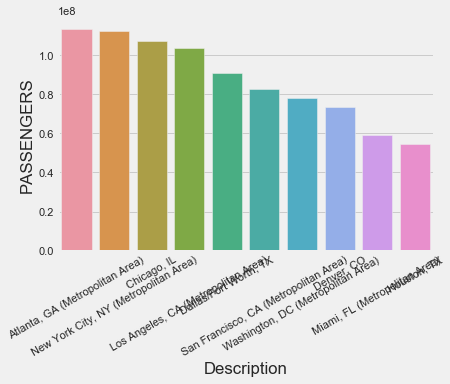

In [296]:
top_10 = sns.barplot(x=top_cities[:10].index, y=top_cities[:10]['PASSENGERS'], data=top_cities[:10])
top_10.set_xticklabels(labels = top_cities[:10].index, rotation=30)